In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

C:\zhengru\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
def load_data():
   
    train_dataset = h5py.File('data_set/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data_set/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [5]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_data()

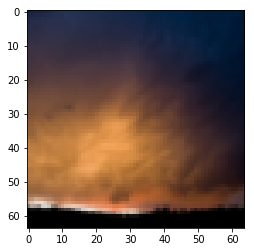

In [6]:
plt.imshow(train_set_x_orig[0])

In [7]:
train_x = train_set_x_orig.reshape(209,64*64*3) /255
train_y = train_set_y_orig
test_x = test_set_x_orig.reshape(50,64*64*3) /255
test_y = test_set_y_orig

In [8]:
def sigmoid(Z):
    return 1./(1.+np.exp(-Z))

In [9]:
def LR(X,y,alpha,Iter,lambd):
    
    m,n = X.shape
    W = np.zeros((1,n))
    b = 0
    costs = []
    for i in range(Iter):
        Z = np.dot(W,X.T) + b
        A = sigmoid(Z)
        loss = - np.sum(y*np.log(A)+(1-y)*np.log(1-A))/m + (lambd /(2*m))*np.sum(W**2)
        if i % 10 == 0:
            costs.append(loss)
        dZ = A - y
        dW = np.dot(dZ,X)/m
        db = np.sum(dZ,axis=1,keepdims=True)/m
        
        W = W - alpha*(dW + lambd * W)
        b = b - alpha * db
    plt.plot(costs,c='orange')
    plt.title('Learning rate:{}'.format(alpha))    
    plt.xlabel('#Iter')
    plt.ylabel('value')
    return W,b

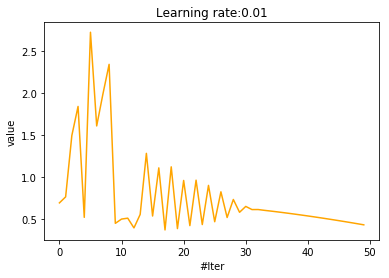

In [10]:
W,b=LR(train_x,train_y,0.01,500,0.01)

In [11]:
def score(X,y,W,b):
    m,n = X.shape
    Z = np.dot(W,X.T) + b
    A = sigmoid(Z)
    predict = np.round(A)
    accuracy = (y==predict).sum() / m
    return accuracy

In [12]:
score(test_x,test_y,W,b)

0.82

In [13]:
score(train_x,train_y,W,b)

0.8086124401913876

In [16]:
def LR_1(X,y,alpha,Iter,lambd):
    
    m,n = X.shape
    W = np.zeros((1,n))
    b = 0
    costs = []
    for i in range(Iter):
        Z = np.dot(W,X.T) + b
        A = sigmoid(Z)
        loss = - np.sum(y*np.log(A)+(1-y)*np.log(1-A))/m + lambd/m*np.sum(abs(W))
        if i % 10 == 0:
            costs.append(loss)
        dZ = A - y
        dW = np.dot(dZ,X)/m
        db = np.sum(dZ,axis=1,keepdims=True)/m
        
        W = W - alpha*(dW + lambd * np.sign(W))
        
        b = b - alpha * db
    plt.plot(costs,c='orange')
    plt.title('Learning rate:{}'.format(alpha))    
    plt.xlabel('#Iter')
    plt.ylabel('value')
    return W,b

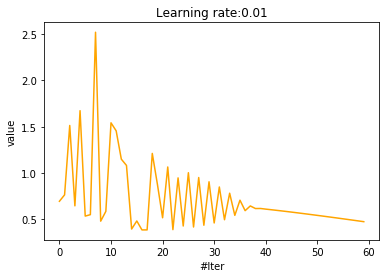

In [38]:
W,b=LR_1(train_x,train_y,0.01,600,0.001)

In [39]:
def score_1(X,y,W,b):
    m,n = X.shape
    Z = np.dot(W,X.T) + b
    A = sigmoid(Z)
    predict = np.round(A)
    accuracy = (y==predict).sum() / m
    return accuracy

In [40]:
score_1(test_x,test_y,W,b)

0.82

In [41]:
score_1(train_x,train_y,W,b)

0.7942583732057417